# [House Prices: Advanced Regression Techniques - Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#tutorials)
* https://www.kaggle.com/dgawlik/house-prices-eda

In [1]:
%ls data

data_description.txt*     test.csv*                 train.csv.gz*
sample_submission.csv*    test.csv.gz*
sample_submission.csv.gz* train.csv*


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as linear_model

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv.gz')
train.shape

(1460, 81)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
missing = train.isnull().sum()
missing

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
desc = [
'SalePrice : the property\'s sale price in dollars. This is the target variable that you\'re trying to predict.',
'MSSubClass: The building class',
'MSZoning: The general zoning classification',
'LotFrontage: Linear feet of street connected to property',
'LotArea: Lot size in square feet',
'Street: Type of road access',
'Alley: Type of alley access',
'LotShape: General shape of property',
'LandContour: Flatness of the property',
'Utilities: Type of utilities available',
'LotConfig: Lot configuration',
'LandSlope: Slope of property',
'Neighborhood: Physical locations within Ames city limits',
'Condition1: Proximity to main road or railroad',
'Condition2: Proximity to main road or railroad (if a second is present)',
'BldgType: Type of dwelling',
'HouseStyle: Style of dwelling',
'OverallQual: Overall material and finish quality',
'OverallCond: Overall condition rating',
'YearBuilt: Original construction date',
'YearRemodAdd: Remodel date',
'RoofStyle: Type of roof',
'RoofMatl: Roof material',
'Exterior1st: Exterior covering on house',
'Exterior2nd: Exterior covering on house (if more than one material)',
'MasVnrType: Masonry veneer type',
'MasVnrArea: Masonry veneer area in square feet',
'ExterQual: Exterior material quality',
'ExterCond: Present condition of the material on the exterior',
'Foundation: Type of foundation',
'BsmtQual: Height of the basement',
'BsmtCond: General condition of the basement',
'BsmtExposure: Walkout or garden level basement walls',
'BsmtFinType1: Quality of basement finished area',
'BsmtFinSF1: Type 1 finished square feet',
'BsmtFinType2: Quality of second finished area (if present)',
'BsmtFinSF2: Type 2 finished square feet',
'BsmtUnfSF: Unfinished square feet of basement area',
'TotalBsmtSF: Total square feet of basement area',
'Heating: Type of heating',
'HeatingQC: Heating quality and condition',
'CentralAir: Central air conditioning',
'Electrical: Electrical system',
'1stFlrSF: First Floor square feet',
'2ndFlrSF: Second floor square feet',
'LowQualFinSF: Low quality finished square feet (all floors)',
'GrLivArea: Above grade (ground) living area square feet',
'BsmtFullBath: Basement full bathrooms',
'BsmtHalfBath: Basement half bathrooms',
'FullBath: Full bathrooms above grade',
'HalfBath: Half baths above grade',
'Bedroom: Number of bedrooms above basement level',
'Kitchen: Number of kitchens',
'KitchenQual: Kitchen quality',
'TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)',
'Functional: Home functionality rating',
'Fireplaces: Number of fireplaces',
'FireplaceQu: Fireplace quality',
'GarageType: Garage location',
'GarageYrBlt: Year garage was built',
'GarageFinish: Interior finish of the garage',
'GarageCars: Size of garage in car capacity',
'GarageArea: Size of garage in square feet',
'GarageQual: Garage quality',
'GarageCond: Garage condition',
'PavedDrive: Paved driveway',
'WoodDeckSF: Wood deck area in square feet',
'OpenPorchSF: Open porch area in square feet',
'EnclosedPorch: Enclosed porch area in square feet',
'3SsnPorch: Three season porch area in square feet',
'ScreenPorch: Screen porch area in square feet',
'PoolArea: Pool area in square feet',
'PoolQC: Pool quality',
'Fence: Fence quality',
'MiscFeature: Miscellaneous feature not covered in other categories',
'MiscVal: $Value of miscellaneous feature',
'MoSold: Month Sold',
'YrSold: Year Sold',
'SaleType: Type of sale',
'SaleCondition: Condition of sale',
]

In [9]:
column_desc = pd.DataFrame(desc)
column_desc.columns = ['desc']
column_desc['col_key'] = column_desc.desc.apply(lambda x : x.split(':')[0])
column_desc['val'] = column_desc.desc.apply(lambda x : x.split(':')[1])
column_desc.head()

,desc,col_key,val
0,SalePrice : the property's sale price in dolla...,SalePrice,the property's sale price in dollars. This is...
1,MSSubClass: The building class,MSSubClass,The building class
2,MSZoning: The general zoning classification,MSZoning,The general zoning classification
3,LotFrontage: Linear feet of street connected t...,LotFrontage,Linear feet of street connected to property
4,LotArea: Lot size in square feet,LotArea,Lot size in square feet


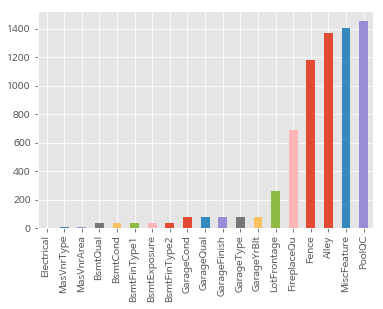

In [10]:
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

전체 데이터 중 19개에 5~50%의 결측치가 있다. 수영장, 담장, 주차장, 지하 등의 요소에 결측치가 있다.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.johnsonsu.html

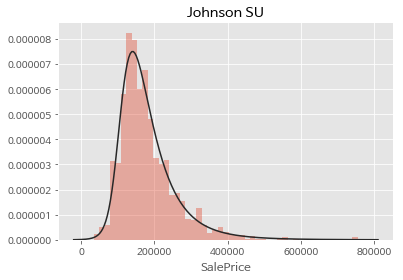

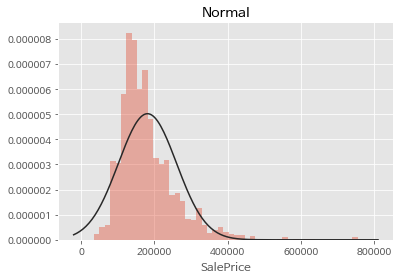

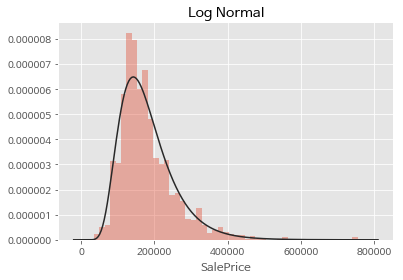

In [11]:
import scipy.stats as st
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 양적 질적 변수 나누기

In [13]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [14]:
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


In [16]:
# 시각화를 위해 melt
f = pd.melt(train, value_vars=quantitative)
f.head()

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0


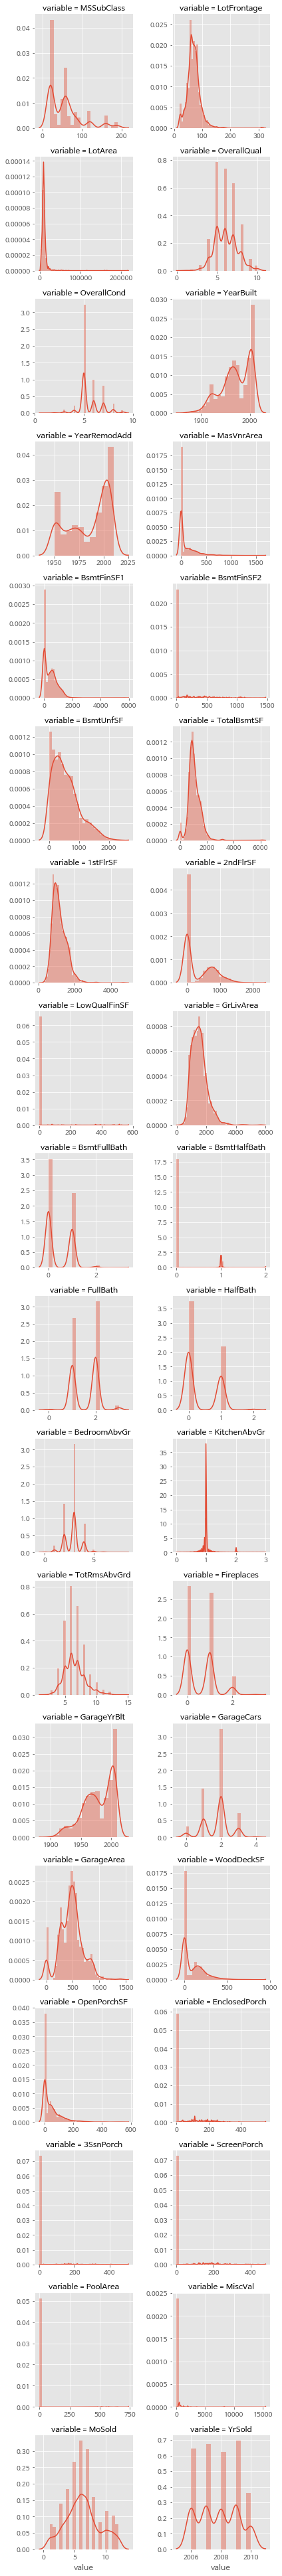

In [17]:
# 변수별로 distplot을 그려본다.
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

* TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea 와 같은 독립 변수는 로그 변환을하면 정규분포를 이룰 것 같음
* 2ndFlrSF는 많은 값들이 0에 몰려있다. 회귀변환을 사용하면 이러한 불규칙성을 완화 해 볼 수 있을것 같다.
* 이런 불규칙성은 피처로 사용하기에 좋은 후보임

## Categorical data

In [18]:
# 칼럼이 의미하는 값을 찾기 위해
column_desc.head()

,desc,col_key,val
0,SalePrice : the property's sale price in dolla...,SalePrice,the property's sale price in dollars. This is...
1,MSSubClass: The building class,MSSubClass,The building class
2,MSZoning: The general zoning classification,MSZoning,The general zoning classification
3,LotFrontage: Linear feet of street connected t...,LotFrontage,Linear feet of street connected to property
4,LotArea: Lot size in square feet,LotArea,Lot size in square feet


In [19]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=60)

# 각 변수의 카테고리값을 melt로 column->row로 이동시킴
# FacetGrid로 그릴 수 있도록 값을 준비
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
print(f.variable.unique())
f.head()

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL


In [20]:
# 컬럼명에 대한 설명 가져오기
def get_col_desc(col_name):
    column_desc.loc[column_desc['col_key'] == col_name]['val'].values[0]

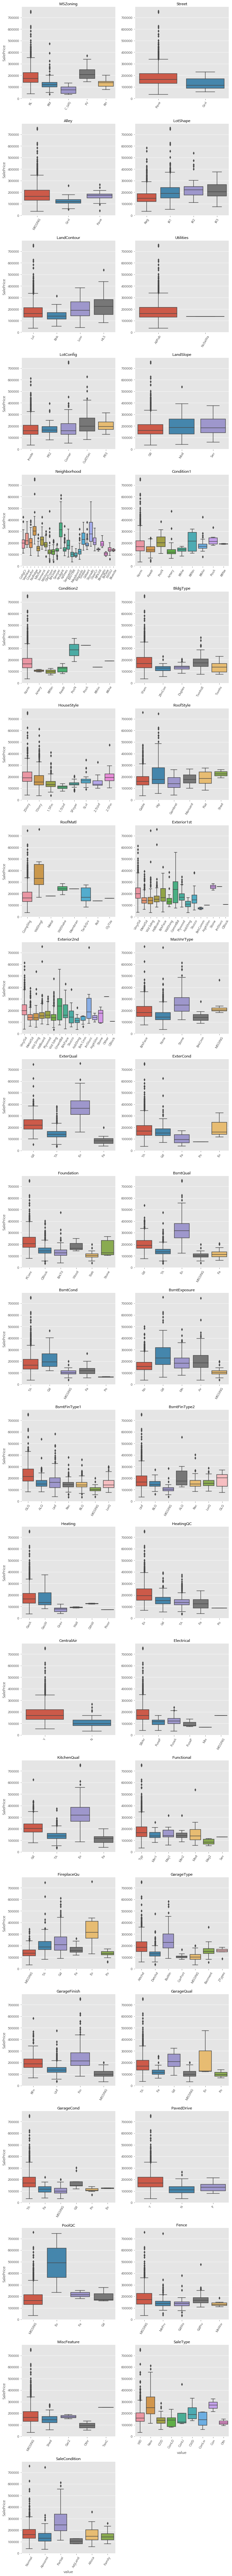

In [21]:
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice").set_titles("{col_name}")

### 분산분석


* 출처 : [분산 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B6%84%EC%82%B0_%EB%B6%84%EC%84%9D)

* 분산 분석(analysis of variance, ANOVA, 변량 분석)은 통계학에서 두 개 이상 다수의 집단을 비교하고자 할 때 집단 내의 분산, 총평균과 각 집단의 평균의 차이에 의해 생긴 집단 간 분산의 비교를 통해 만들어진 F분포를 이용하여 가설검정을 하는 방법이다. 통계학자이자 유전학자인 로날드 피셔(R.A. Fisher)에 의해 1920년대에서 1930년대에 걸쳐 만들어졌다.

#### 일원분산분석(one-way ANOVA)
종속변인은 1개이며, 독립변인의 집단도 1개인 경우이다.

예1) 가구소득에 따른 식료품소비 정도의 차이이다. 여기서 가구소득은 독립변인으로 가구소득집단의 구분-저소득, 중산층, 고소득층 등으로 2개 이상이다. 독립변인의 집단이 2개 이상이므로 사후분석을 실시한다.

예2) 한/중/일 국가간 10세 남아의 체중비교의 경우이다. 독립변인:10세 남아, 독립변인 : 3개 (한/중/일), 종속변인 : 1개(체중) 이다.

#### 이원분산분석(two-way ANOVA)
독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용한다.

예1) 독립변인 2개, 종속변인이 동일한 경우로 학력및 성별에 따른 휴대폰요금의 차이를 분석한다면 이때 학력, 성별은 독립변인이고 종속변인은 휴대폰요금이 된다. 이원분산분석은 주효과와 상호작용효과를 분석할 수 있다. 주효과는 학력(a), 성별(b)이라면 상호작용효과는 이를 곱한 a*b이다. 여기서 상호작용효과가 유의하다면 그래프를 만들어 볼 수 있다.

예2) 한/중/일 국가간 성별과 학력에 따른 체중비교의 경우이다. 독립변인 : 2개(성별/학력), 독립변인의 집단 : 3개 (한/중/일), 종속변인 : 1개(체중) 이다.

#### 다원변량분산분석(MANOVA)
단순한 분산분석을 확장하여 두개 이상의 종속변인이 서로 관계된 상황에 적용시킨 것이다. 둘 이상의 집단간 차이를 검증 할 수 있다.

#### 공분산분석(ANCOVA)
다원변량분산분석에서 특정한 독립변인에 초점을 맞추고 다른 독립변인은 통제변수로 하여 분석하는 방법이다. 특정한 사항을 제한을 하여 분산분석을 하는 것이다.

In [22]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a.head()

,feature,pval
8,Neighborhood,1.558600e-225
18,ExterQual,1.439551e-204
21,BsmtQual,8.158548e-196
30,KitchenQual,3.032213e-192
34,GarageFinish,6.228747e-115


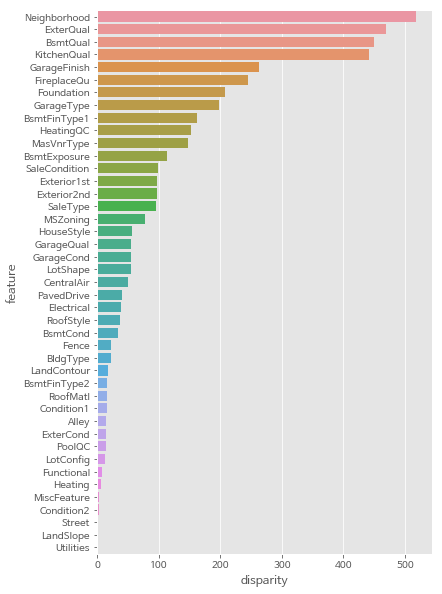

In [23]:
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(6, 10))
sns.barplot(data=a, y='feature', x='disparity')

In [24]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


## Correlations

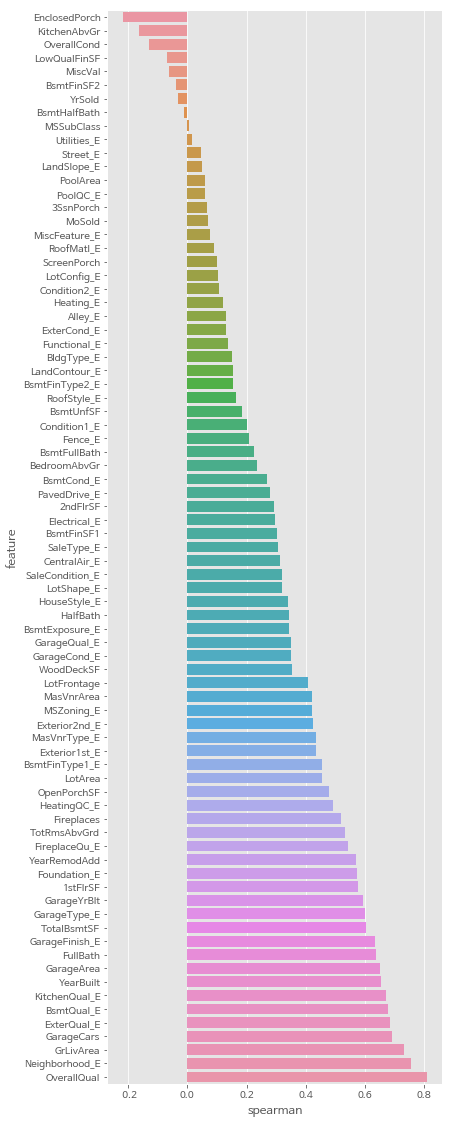

In [25]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

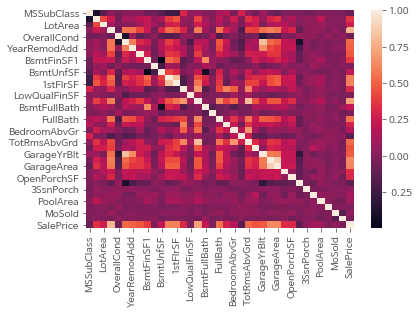

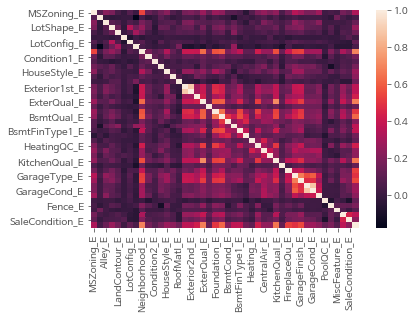

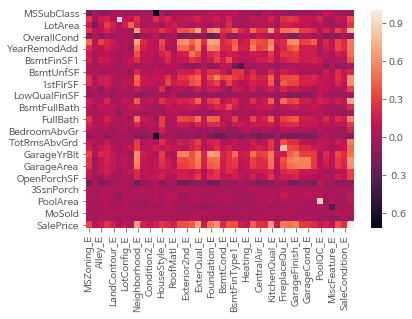

In [26]:
plt.figure(1)
corr = train[quantitative + ['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = train[qual_encoded + ['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative) + 1, len(qual_encoded) + 1]), 
                    index=quantitative + ['SalePrice'], 
                    columns=qual_encoded + ['SalePrice'])
for q1 in quantitative + ['SalePrice']:
    for q2 in qual_encoded + ['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr)

## Pairplots

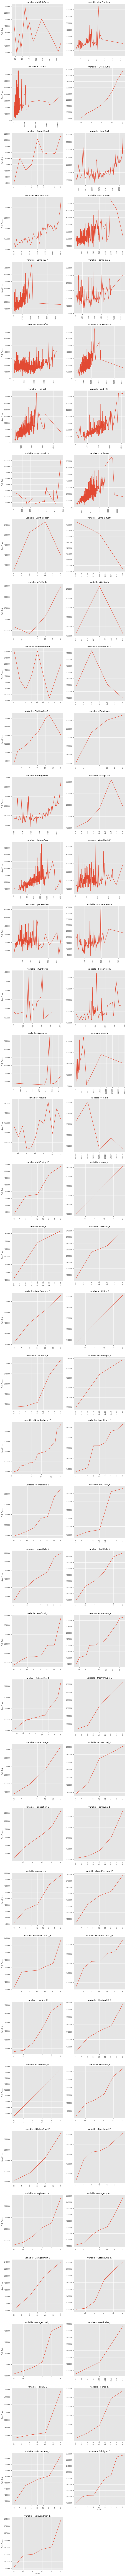

In [27]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative + qual_encoded)
g = sns.FacetGrid(f, col='variable',  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, 'value', 'SalePrice')

## Price Segments

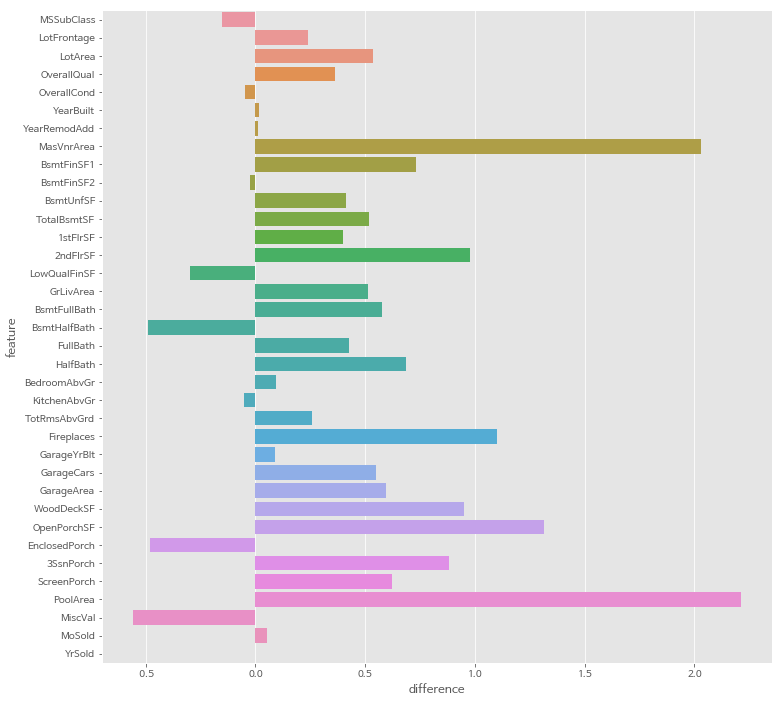

In [28]:
features = quantitative

standard = train[train['SalePrice'] < 200000]
pricey = train[train['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.barplot(data=diff, y='feature', x='difference')

## Clustering

In [29]:
features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)
tsne

array([[-11.105829 , -18.94234  ],
       [ -1.769067 ,   1.7185289],
       [-21.369432 ,   7.1250424],
       ...,
       [ -7.9386683,  -9.487479 ],
       [ -2.3240125,  -2.6143346],
       [ -3.6492279,   4.513644 ]], dtype=float32)

In [30]:
std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

0.749244317653981


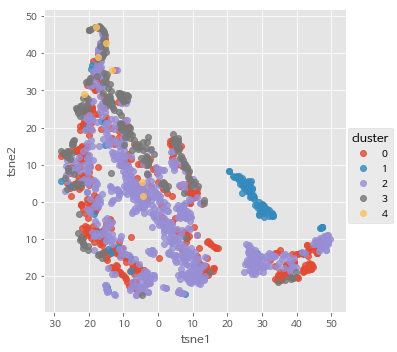

In [32]:
fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

##  SalePrice의 Johnson Transform

* [Power transform - Wikipedia](https://en.wikipedia.org/wiki/Power_transform)
* [Johnson's SU-distribution - Wikipedia](https://en.wikipedia.org/wiki/Johnson%27s_SU-distribution)
* Box Cox, Fisher 및 Johnson 변환을 시도했지만 간단한 선형 회귀 분석에서 로그를 맞출 수 없었음
* 학습데이터셋에 파라메터가 오버핏 되어 있을 수 있음
* 1500 개 이상의 인스턴스가있는 경우 로그 변환의 대안이 될 수 있음

In [33]:
y = train['SalePrice'].values
y[:10]

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000])

In [34]:
def johnson(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta * np.arcsinh((y - epsilon) / lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda * np.sinh((y-gamma)/eta) + epsilon

In [35]:
yt, g, et, ep, l = johnson(y)

In [36]:
yt2 = johnson_inverse(yt, g, et, ep, l)
yt2

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

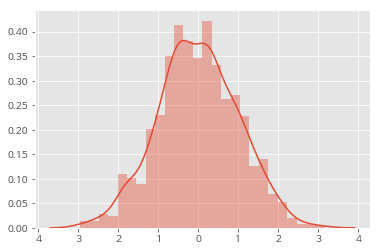

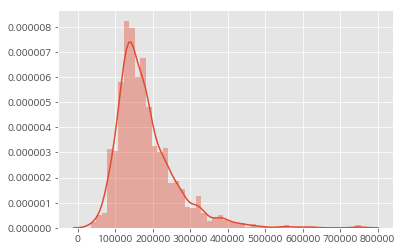

In [37]:
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)

## Regression

In [38]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual - predicted)) / len(actual))

def log_transform(feature):
    train[feature] = np.log1p(train[feature].values)

def quadratic(feature):
    train[feature + '2'] = train[feature] ** 2

In [39]:
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

In [40]:
qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

train['HasBasement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasMasVnr'] = train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']


features = quantitative + qual_encoded + boolean + qdr
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

0.1126326901784307